## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

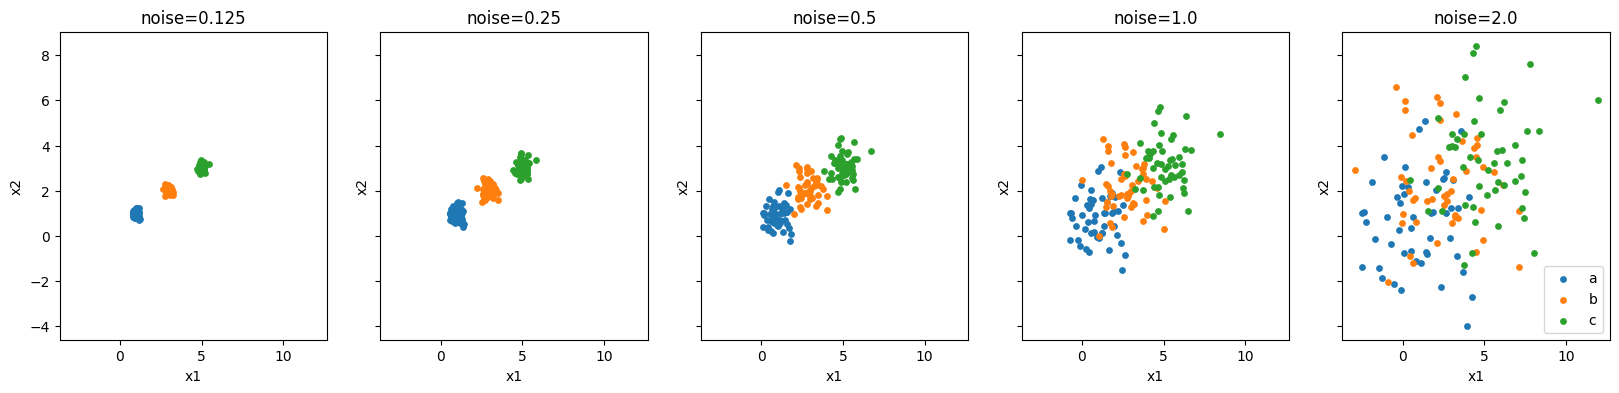

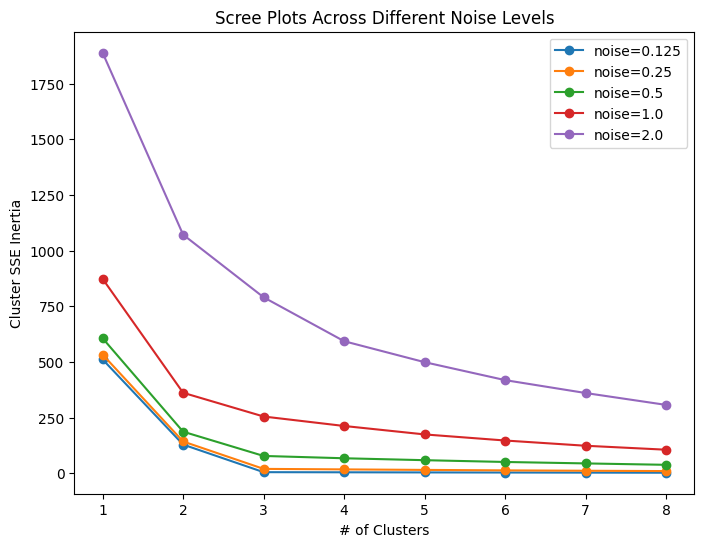

'\nIt is clear that with lower noise, the elbow is easy to spot at k = 3, as the line pretty much levels out exactly at that point. It is not as clear with higher noise levels, as the data seems to be of lower quality and far more varient. BEcuase it flattens out, it means that adding more clusters does not really reduce the overall square difference, and becuase you are always looking for the lowest k value that basically reaches the minimum, it can be said that the ideal cluster number is 3 according to this example.\n '

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from django.db.models.sql import Query
from sklearn.cluster import KMeans

# Q1.1
def createData(noise, N=50):
    np.random.seed(100)  # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1, noise, N), np.random.normal(1, noise, N)])
    X2 = np.array([np.random.normal(3, noise, N), np.random.normal(2, noise, N)])
    X3 = np.array([np.random.normal(5, noise, N), np.random.normal(3, noise, N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1': X1[0, :], 'x2': X1[1, :], 'group': 'a'})
    gdf2 = pd.DataFrame({'x1': X2[0, :], 'x2': X2[1, :], 'group': 'b'})
    gdf3 = pd.DataFrame({'x1': X3[0, :], 'x2': X3[1, :], 'group': 'c'})
    df = pd.concat([gdf1, gdf2, gdf3], axis=0)
    return df


df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

# Q1.2
noise_datasets = {
    "noise=0.125": df0_125,
    "noise=0.25": df0_25,
    "noise=0.5": df0_5,
    "noise=1.0": df1_0,
    "noise=2.0": df2_0
}

fig, axes = plt.subplots(1,5,figsize=(20,4),sharex=True,sharey=True)
for ax,(label,df) in zip(axes,noise_datasets.items()):
    for g in df["group"].unique():
        dfg = df[df["group"]==g]
        ax.scatter(dfg["x1"],dfg["x2"],label=g,s=15)
    ax.set_title(label)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    
plt.legend()
plt.show()

'''
In the scatter plots generated, it is clear to see that as the noise increases, it becomes increasingly difficult to see where the clusters are centered and how they compare to the other groups. The standard deviation increase leads to a lot of point overlap between catagories, making it much harder to draw absolute conclusions about the data
'''

# Q2.3

def scree_plot(df, max_k=8):
    inertias = []
    for k in range(1,max_k+1):
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        km.fit(df[["x1","x2"]])
        inertias.append(km.inertia_)
    return inertias

plt.figure(figsize=(8,6))
for label,df in noise_datasets.items():
    inertias = scree_plot(df)
    plt.plot(range(1,len(inertias)+1), inertias, marker='o', label=label)
plt.xlabel("# of Clusters")
plt.ylabel("Cluster SSE Inertia")
plt.title("Scree Plots Across Different Noise Levels")
plt.legend()
plt.show()

'''
As the noise increases, so does the intertia across the board increases, which makes sense because there is more varience from the centroid for the average point. You can also notie that the curve gets noticably flatter, quicker, at lower values of noise, allowing us to more easily use the elbow method to find that the best number of clusters is 3.
'''

# Q1.4
'''
It is clear that with lower noise, the elbow is easy to spot at k = 3, as the line pretty much levels out exactly at that point. It is not as clear with higher noise levels, as the data seems to be of lower quality and far more varient. BEcuase it flattens out, it means that adding more clusters does not really reduce the overall square difference, and becuase you are always looking for the lowest k value that basically reaches the minimum, it can be said that the ideal cluster number is 3 according to this example.
 '''

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?

(148, 7)
     Spending (2020 USD)  Spending per Capita  Percent of Government Spending  \
32            279.576955             7.181899                        0.049728   
66            187.433234            65.126211                        0.037952   
100          9708.277440           221.392384                        0.173924   
134           993.594405            30.231680                        0.074624   
168          2830.929705            62.636731                        0.017268   

     Percent of GDP  
32         0.013589  
66         0.012583  
100        0.066600  
134        0.014442  
168        0.007269  


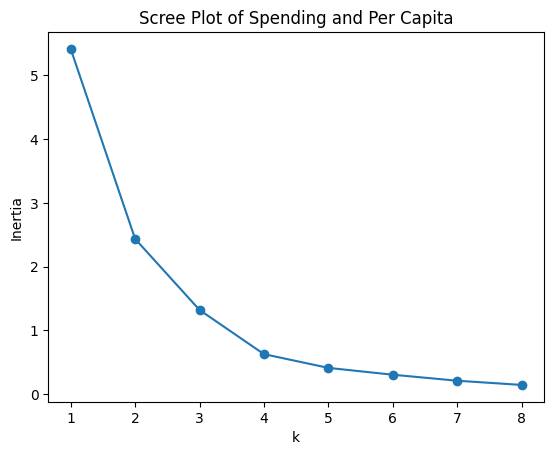

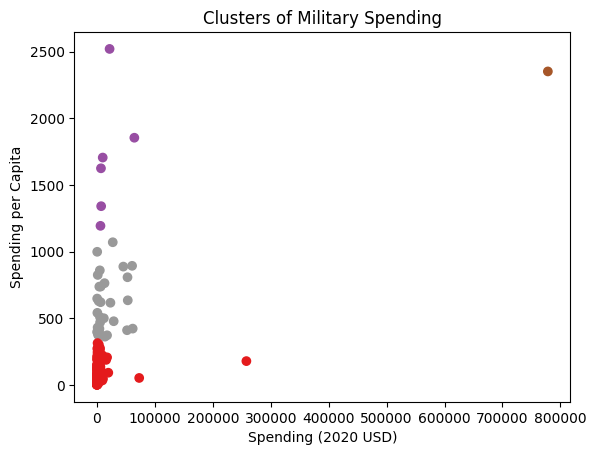

              Spending (2020 USD)                                              \
                            count           mean           std            min   
cluster_spend                                                                   
0                           111.0    4859.185065  25405.739131       8.622460   
1                             6.0   19443.362047  22861.507114    6095.708713   
2                             1.0  778397.200000           NaN  778397.200000   
3                            30.0   17077.591354  20583.053357     405.790494   

                                                                           \
                         25%            50%            75%            max   
cluster_spend                                                               
0                 130.010211     382.464677    2297.032353  257973.429834   
1                7023.251766    8624.225729   18857.070183   64558.400000   
2              778397.200000  778397.200000  77

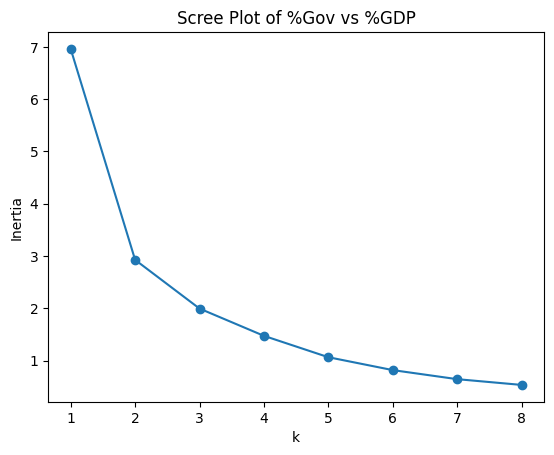

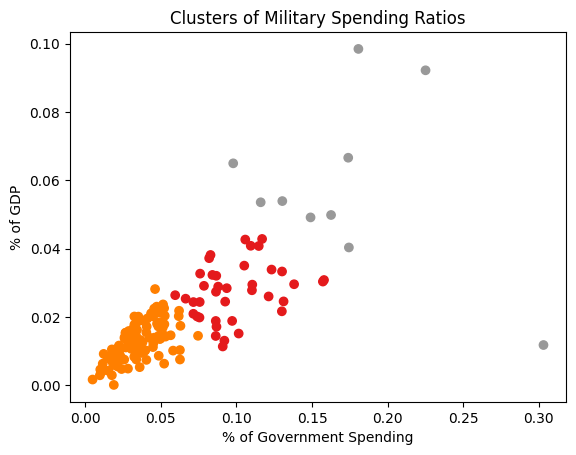

            Percent of Government Spending                                \
                                     count      mean       std       min   
cluster_pct                                                                
0                                     39.0  0.098683  0.024125  0.059520   
1                                     99.0  0.035777  0.014549  0.004896   
2                                     10.0  0.171289  0.058725  0.097882   

                                                    Percent of GDP            \
                  25%       50%       75%       max          count      mean   
cluster_pct                                                                    
0            0.082430  0.092044  0.112633  0.157918           39.0  0.027412   
1            0.025921  0.034261  0.047402  0.074624           99.0  0.012664   
2            0.135010  0.168248  0.179081  0.303027           10.0  0.058071   

                                                              

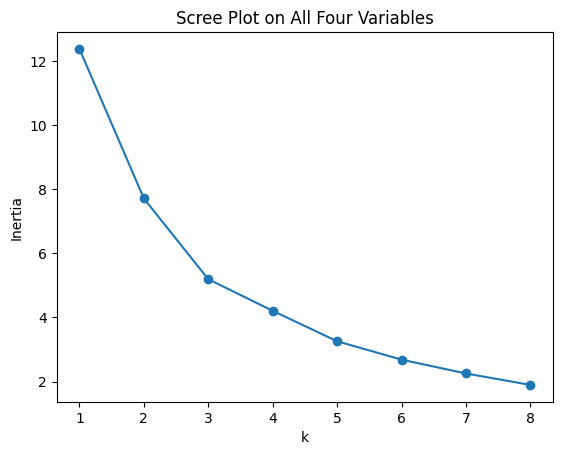

             index                                                            \
             count         mean          std     min     25%     50%     75%   
cluster_all                                                                    
0             31.0  2512.903226  1789.866352   100.0   780.0  2514.0  3721.0   
1              6.0  4038.333333  1113.917352  2582.0  3202.5  4265.0  4613.5   
2            111.0  2854.918919  1618.183489    32.0  1545.0  2888.0  4231.0   

                      Year          ... cluster_spend      cluster_pct  \
                max  count    mean  ...           75%  max       count   
cluster_all                         ...                                  
0            5438.0   31.0  2020.0  ...           0.0  3.0        31.0   
1            5540.0    6.0  2020.0  ...           1.0  2.0         6.0   
2            5880.0  111.0  2020.0  ...           0.0  3.0       111.0   

                                                          
               

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Q3.1
df = pd.read_csv("./data/SIPRI Military Expenditure Database.csv")
# remove every year except 2020
df_2020 = df[df["Year"] == 2020].dropna()
print(df_2020.shape)

# checking columns to see if any other cleaning is neccessary
print(df_2020[["Spending (2020 USD)", "Spending per Capita",
         "Percent of Government Spending", "Percent of GDP"]].head())
# looks like the data is pretty well cleaned and there are no obvious other steps to cleaning

# Q3.2

#min max normalizing the data using built in capability in sklearn
X = df_2020[["Spending (2020 USD)", "Spending per Capita"]].copy()
X_scaled = MinMaxScaler().fit_transform(X)

# make the screen plot
inertias = []
for k in range(1, 9):
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 9), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Scree Plot of Spending and Per Capita")
plt.show()

# According to the scree plot it seems that k = 4 is the optimal number of clusters, as that is where the best match to an elbow appears.

# make the scatter plot
k_opt = 4
km = KMeans(n_clusters=k_opt, n_init=10, random_state=42)
df_2020["cluster_spend"] = km.fit_predict(X_scaled)

plt.scatter(X["Spending (2020 USD)"], X["Spending per Capita"],
            c=df_2020["cluster_spend"], cmap="Set1")
plt.xlabel("Spending (2020 USD)")
plt.ylabel("Spending per Capita")
plt.title("Clusters of Military Spending")
plt.show()

# It seems that most countries dont spend that much on their military, with the vast majority being within the first range of 0 to 100,000. However, there aree a few outliers, which at this point I will assume is china and the US. In addition, I see a huge amount of varience in spending per capita, which makes sense as smaller population countries still need a decent military. 

# Cluster summaries
print(df_2020.groupby("cluster_spend")[["Spending (2020 USD)",
                                        "Spending per Capita"]].describe())
# The 4 clusters are hugely varied in membership size, with the red having 111 countries, grey having 30, and purple having 6, and yellow having 1.

# Check US
print(df_2020[df_2020["Country"] == "United States of America"])
# The US is the one yellow cluster, which is to be expected given how much we hear about US miliary spending on the news.


# Q3.3

#here we do the exact same thing as the question before.

Y = df_2020[["Percent of Government Spending", "Percent of GDP"]]
Y_scaled = MinMaxScaler().fit_transform(Y)

inertias = []
for k in range(1, 9):
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(Y_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 9), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Scree Plot of %Gov vs %GDP")
plt.show()

# it looks like the ideal number of clusters is probably 3, but finding the elbow is much more difficult with this example. 

km = KMeans(n_clusters=3, n_init=10, random_state=42).fit(Y_scaled)
df_2020["cluster_pct"] = km.labels_

plt.scatter(Y["Percent of Government Spending"], Y["Percent of GDP"],
            c=df_2020["cluster_pct"], cmap="Set1")
plt.xlabel("% of Government Spending")
plt.ylabel("% of GDP")
plt.title("Clusters of Military Spending Ratios")
plt.show()

print(df_2020.groupby("cluster_pct")[["Percent of Government Spending",
                                      "Percent of GDP"]].describe())

#The graph seems to be much more linear, following a pattern of higher spending compared to total government spending means higher spending of GDP. Of course there are a few outliers which may be caused by low tax rate countries or small governments, but generally its a positive linear relationship with seemingly 3 clear clusters.

# Q3.4 

# setting up k means clustering with all 4 variables.
Z = df_2020[["Spending (2020 USD)", "Spending per Capita",
             "Percent of Government Spending", "Percent of GDP"]]
Z_scaled = MinMaxScaler().fit_transform(Z)

inertias = []
for k in range(1, 9):
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(Z_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 9), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Scree Plot on All Four Variables")
plt.show()

km = KMeans(n_clusters=3, n_init=10, random_state=42).fit(Z_scaled)
df_2020["cluster_all"] = km.labels_

print(df_2020.groupby("cluster_all").describe())

# For all four variables, k = 3 seems to be the ideal number for clusters. The graph looks very similar to that of Q3, where there is a harder time finding the optimal k value, whereas part 2 it was made very clear given the deminishing returns of increasing the value. 

# Q3.5

# Yes, it shows that some of the largest and most powerful countries like the US and China are outliers in terms of military spending and rarely are included in the most populus cluster. You can also see small wealthy countries seem to have a high per-capita spending, becuase of their excess of wealth per person living there. However, the main takeaway is that most countries spend very little on their military, and some of the overarching stats across all cuntries are scewed by the big spending outliers. 